## More Linear Regression Practice

In this notebook, you'll be working with data on cars from the year 2010 with the goal being to see how well you can predict the fuel economy based on the other variables that you have.

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer

In [3]:
cars = pd.read_csv('data/cars_2010.csv')

In [4]:
cars.head()

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


First, we'll build a linear model that uses only the EngDispl variable. Make sure that you do a train/test split before fitting your model so that you can evaluate its performance.

In [5]:
variables = ['EngDispl']

X = cars[variables]
y = cars['FE']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321)

linreg = LinearRegression().fit(X_train, y_train)

In [6]:
coefficients = pd.DataFrame({
    'variable': ['intercept'] + list(X_train.columns),
    'coefficient': [linreg.intercept_] + list(linreg.coef_)
})

coefficients

,variable,coefficient
0,intercept,50.486867
1,EngDispl,-4.505576


**Question 1:** What would the predicted FE value be for a car with an EngDispl value of 3?

Now, let's look at how well our model did on the test data.

In [7]:
print(f'Mean Squared Error: {mean_squared_error(y_test, linreg.predict(X_test))}')
print(f'R2: {r2_score(y_test, linreg.predict(X_test))}')

Mean Squared Error: 22.75089012385169
R2: 0.5999451221799641


Now, we'll build a model that uses just the AirAspirationMethod to predict fuel economy.

In [8]:
variables = ['AirAspirationMethod']
categorical_variables = ['AirAspirationMethod']

X = cars[variables]
y = cars['FE']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321)

pipe = Pipeline(steps = [
    ('ct', ColumnTransformer(
        transformers = [
            ('ohe', OneHotEncoder(drop = 'first'), categorical_variables)
        ],
        remainder = 'passthrough'
    )
    ),
    ('linreg', LinearRegression())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  ['AirAspirationMethod'])])),
                ('linreg', LinearRegression())])

In [9]:
print(f'MSE: {mean_squared_error(y_test, pipe.predict(X_test))}')
print(f'R2: {r2_score(y_test, pipe.predict(X_test))}')

MSE: 55.47120279927464
R2: 0.02458650463398815


In [10]:
features = list(pipe['ct'].named_transformers_['ohe'].get_feature_names(categorical_variables))
features += [x for x in X_train.columns if x not in categorical_variables]

coefficients = pd.DataFrame({
    'variable': ['intercept'] + features,
    'coefficient': [pipe['linreg'].intercept_] + list(pipe['linreg'].coef_)
})
coefficients

,variable,coefficient
0,intercept,34.648947
1,AirAspirationMethod_Supercharged,-3.302847
2,AirAspirationMethod_Turbocharged,1.338254


**Question 2:** What does your model predict for the FE value for a Turbocharged car?

Now, we'll fit a model using the Engine Displacement and AirAspirationMethod but not the interaction between them.

In [11]:
variables = ['EngDispl', 'AirAspirationMethod']
categorical_variables = ['AirAspirationMethod']

X = cars[variables]
y = cars['FE']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321)

pipe = Pipeline(steps = [
    ('ct', ColumnTransformer(
        transformers = [
            ('ohe', OneHotEncoder(drop = 'first'), categorical_variables)
        ],
        remainder = 'passthrough'
        )
    ),
    ('linreg', LinearRegression())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  ['AirAspirationMethod'])])),
                ('linreg', LinearRegression())])

In [12]:
features = list(pipe['ct'].named_transformers_['ohe'].get_feature_names(categorical_variables))
features += [x for x in X_train.columns if x not in categorical_variables]

coefficients = pd.DataFrame({
    'variable': ['intercept'] + features,
    'coefficient': [pipe['linreg'].intercept_] + list(pipe['linreg'].coef_)
})
coefficients

,variable,coefficient
0,intercept,50.955918
1,AirAspirationMethod_Supercharged,-0.974454
2,AirAspirationMethod_Turbocharged,-1.513939
3,EngDispl,-4.570938


**Question 3:** What does your model predict for the FE value of a supercharged car that has and EngDispl value of 4?

**Question 4:** What does your model predict for the FE value of a naturally aspirated car that has and EngDispl value of 4?

Let's see how this affected the model performance.

In [13]:
print(f'MSE: {mean_squared_error(y_test, pipe.predict(X_test))}')
print(f'R2: {r2_score(y_test, pipe.predict(X_test))}')

MSE: 23.03907472758885
R2: 0.5948776432457302


Now, we'll fit a model using EngDispl, AirAspirationMethod, and the interaction between the two variables.

In [17]:
variables = ['EngDispl', 'AirAspirationMethod']
categorical_variables = ['AirAspirationMethod']

X = cars[variables]
y = cars['FE']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321)

pipe = Pipeline(steps = [
    ('ct', ColumnTransformer(
        transformers = [
            ('ohe', OneHotEncoder(drop = 'first'), categorical_variables)
        ],
        remainder = 'passthrough'
        )
    ),
    ('pf', PolynomialFeatures(include_bias=False, interaction_only=True)),
    ('linreg', LinearRegression())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  ['AirAspirationMethod'])])),
                ('pf',
                 PolynomialFeatures(include_bias=False, interaction_only=True)),
                ('linreg', LinearRegression())])

In [18]:
features = list(pipe['ct'].named_transformers_['ohe'].get_feature_names(categorical_variables))
features += [x for x in X_train.columns if x not in categorical_variables]
features = pipe['pf'].get_feature_names(features)

coefficients = pd.DataFrame({
    'variable': ['intercept'] + features,
    'coefficient': [pipe['linreg'].intercept_] + list(pipe['linreg'].coef_)
})
coefficients

,variable,coefficient
0,intercept,5.095005e+01
1,AirAspirationMethod_Supercharged,-8.517655e+00
2,AirAspirationMethod_Turbocharged,-9.360632e-01
3,EngDispl,-4.569292e+00
4,AirAspirationMethod_Supercharged AirAspiration...,-8.881784e-16
5,AirAspirationMethod_Supercharged EngDispl,1.850014e+00
6,AirAspirationMethod_Turbocharged EngDispl,-1.959704e-01


**Question 5:** What FE value does the model predict for a supercharged car with an EngDispl value of 4?

Let's check how it did on the test data.

In [23]:
print(f'MSE: {mean_squared_error(y_test, pipe.predict(X_test))}')
print(f'R2: {r2_score(y_test, pipe.predict(X_test))}')

MSE: 20.162368729787648
R2: 0.6454620494034481


Let's look at the plot of EngDispl vs. FE.

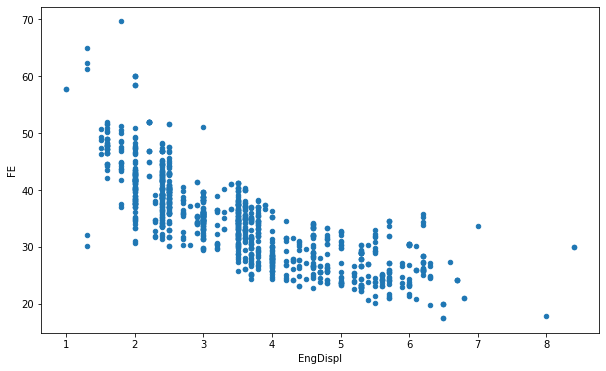

In [20]:
cars.plot(kind = 'scatter', x = 'EngDispl', y = 'FE', figsize = (10,6));

It looks like the relationship between these variable might be slightly non-linear. Perhaps a higher degree polynomial will fit better.
Let's try fitting a model of the form

$$\text{Predicted FE} = \beta_0 + \beta_1\cdot(\text{EngDispl}) + \beta_2\cdot(\text{EngDispl})^2$$

We'll do that using the PolynomialFeatures class again.

In [21]:
variables = ['EngDispl']

X = cars[variables]
y = cars['FE']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321)

pipe = Pipeline(steps = [
    ('pf', PolynomialFeatures(include_bias=False, interaction_only=False, degree = 2)),
    ('linreg', LinearRegression())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('pf', PolynomialFeatures(include_bias=False)),
                ('linreg', LinearRegression())])

In [22]:
features = pipe['pf'].get_feature_names(variables)

coefficients = pd.DataFrame({
    'variable': ['intercept'] + features,
    'coefficient': [pipe['linreg'].intercept_] + list(pipe['linreg'].coef_)
})
coefficients

,variable,coefficient
0,intercept,63.112340
1,EngDispl,-11.849898
2,EngDispl^2,0.934870


**Question 6:** What does this model predict for the fuel economy of a car with an EngDispl value of 4?

Let's check the model performance.

In [24]:
print(f'MSE: {mean_squared_error(y_test, pipe.predict(X_test))}')
print(f'R2: {r2_score(y_test, pipe.predict(X_test))}')

MSE: 20.162368729787648
R2: 0.6454620494034481


If you want to see the curve that was fit, you can use the following code to create the plot.

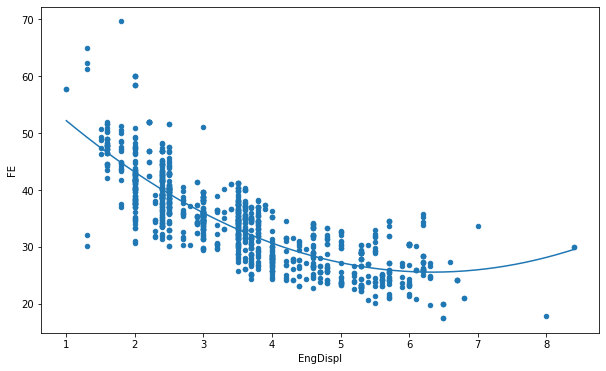

In [25]:
x_grid = np.linspace(start = cars['EngDispl'].min(),
                    stop = cars['EngDispl'].max(),
                    num = 150)
y_grid = pipe.predict(x_grid.reshape(-1, 1))

fig, ax = plt.subplots(figsize = (10,6))
plt.plot(x_grid, y_grid)
cars.plot(kind = 'scatter',
             x = 'EngDispl',
             y = 'FE', ax = ax);

**Bonus Questions:** Continue to explore other variables and see how well you can fit a linear model to this dataset.